**Support Vector Machine**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [3]:
#Generate Data

# Reproducibility
np.random.seed(42)

# Generate input data
X = np.sort(5 * np.random.rand(120, 1), axis=0)

# True function
def f(x):
    return np.sin(x)

# Observed data with noise
y = f(X).ravel() + 0.3 * np.random.randn(len(X))


In [4]:
#Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [6]:
#Support Vector Machine Model

svr_linear = SVR(kernel="linear", C=10.0)
svr_poly   = SVR(kernel="poly", degree=3, C=10.0)
svr_rbf    = SVR(kernel="rbf", gamma=0.5, C=10.0, epsilon=0.1)

svr_linear.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)


SVR(C=10.0, gamma=0.5)

In [7]:
#Predicting on the dense grid

X_plot = np.linspace(0, 5, 500).reshape(-1, 1)

y_pred_linear = svr_linear.predict(X_plot)
y_pred_poly   = svr_poly.predict(X_plot)
y_pred_rbf    = svr_rbf.predict(X_plot)


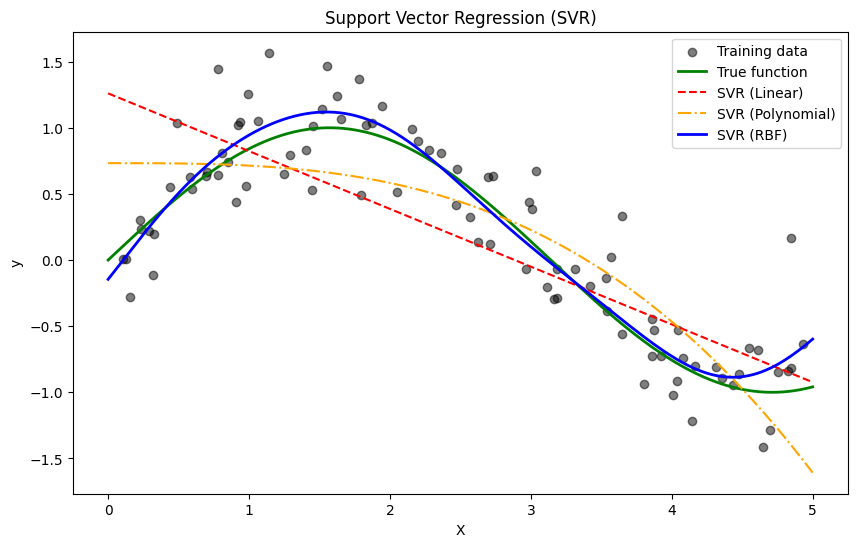

In [8]:
#Plot Results

plt.figure(figsize=(10, 6))

# Training data
plt.scatter(X_train, y_train, color="black", alpha=0.5, label="Training data")

# True function
plt.plot(X_plot, f(X_plot), color="green", linewidth=2, label="True function")

# SVR predictions
plt.plot(X_plot, y_pred_linear, color="red", linestyle="--", label="SVR (Linear)")
plt.plot(X_plot, y_pred_poly, color="orange", linestyle="-.", label="SVR (Polynomial)")
plt.plot(X_plot, y_pred_rbf, color="blue", linewidth=2, label="SVR (RBF)")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Support Vector Regression (SVR)")
plt.legend()
plt.show()


**With Support Vectors**

In [10]:
np.random.seed(42)

X = np.sort(5 * np.random.rand(120, 1), axis=0)

def f(x):
    return np.sin(x)

y = f(X).ravel() + 0.3 * np.random.randn(len(X))


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [27]:
svr = SVR(kernel="rbf", C=10.0, gamma=0.5, epsilon=0.4)
svr.fit(X_train, y_train)


SVR(C=10.0, epsilon=0.4, gamma=0.5)

In [28]:
support_indices = svr.support_
X_support = X_train[support_indices]
y_support = y_train[support_indices]


In [29]:
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred = svr.predict(X_plot)


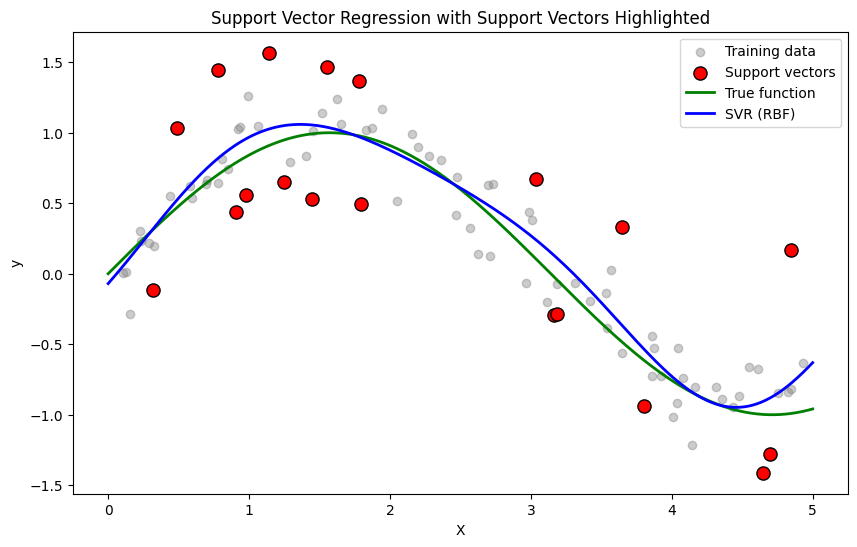

In [30]:
plt.figure(figsize=(10, 6))

# All training points
plt.scatter(
    X_train, y_train,
    color="gray", alpha=0.4, label="Training data"
)

# Support vectors
plt.scatter(
    X_support, y_support,
    color="red", s=90, edgecolor="black",
    label="Support vectors"
)

# True function
plt.plot(
    X_plot, f(X_plot),
    color="green", linewidth=2,
    label="True function"
)

# SVR prediction
plt.plot(
    X_plot, y_pred,
    color="blue", linewidth=2,
    label="SVR (RBF)"
)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Support Vector Regression with Support Vectors Highlighted")
plt.legend()
plt.show()


**Epsilon Tube, Support Vectors and Support Vector Regression**

In [17]:
np.random.seed(42)

X = np.sort(5 * np.random.rand(120, 1), axis=0)

def f(x):
    return np.sin(x)

y = f(X).ravel() + 0.3 * np.random.randn(len(X))


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [23]:
epsilon = 0.3

svr = SVR(
    kernel="rbf",
    C=10.0,
    gamma=0.5,
    epsilon=epsilon
)

svr.fit(X_train, y_train)


SVR(C=10.0, epsilon=0.3, gamma=0.5)

In [24]:
support_idx = svr.support_
X_support = X_train[support_idx]
y_support = y_train[support_idx]


In [25]:
#Epsilon Tube
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)

y_pred = svr.predict(X_plot)
y_upper = y_pred + epsilon
y_lower = y_pred - epsilon


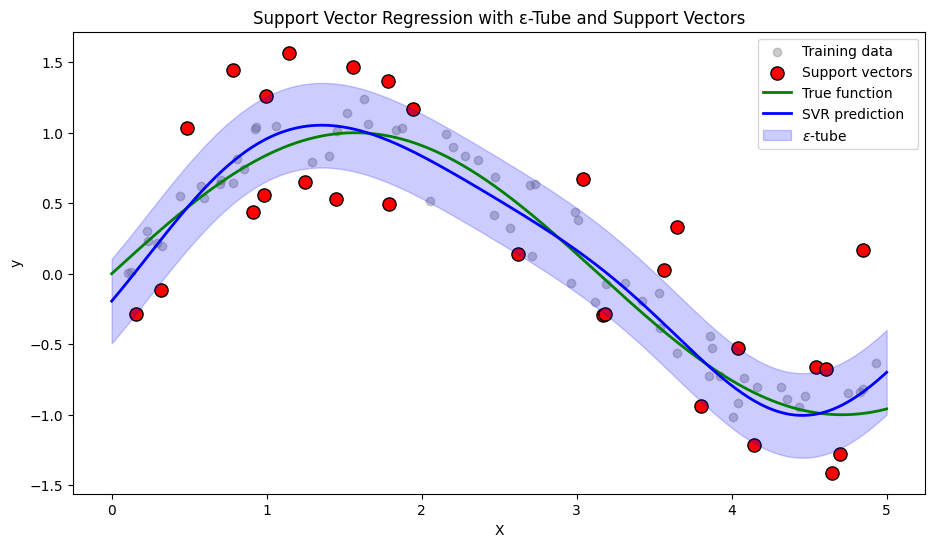

In [26]:
plt.figure(figsize=(11, 6))

# Training data
plt.scatter(
    X_train, y_train,
    color="gray", alpha=0.4,
    label="Training data"
)

# Support vectors
plt.scatter(
    X_support, y_support,
    color="red", s=90, edgecolor="black",
    label="Support vectors"
)

# True function
plt.plot(
    X_plot, f(X_plot),
    color="green", linewidth=2,
    label="True function"
)

# SVR prediction
plt.plot(
    X_plot, y_pred,
    color="blue", linewidth=2,
    label="SVR prediction"
)

# Epsilon tube
plt.fill_between(
    X_plot.ravel(),
    y_lower,
    y_upper,
    color="blue",
    alpha=0.2,
    label=r"$\varepsilon$-tube"
)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Support Vector Regression with ε-Tube and Support Vectors")
plt.legend()
plt.show()
